# Intro sur seaborn

C'est une srucouche à Matplotlib qui est adapté aux DataFrame et qui fait tout même la vaisselle. 

In [20]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.__version__
sns.set(style="whitegrid", palette="muted")

In [21]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


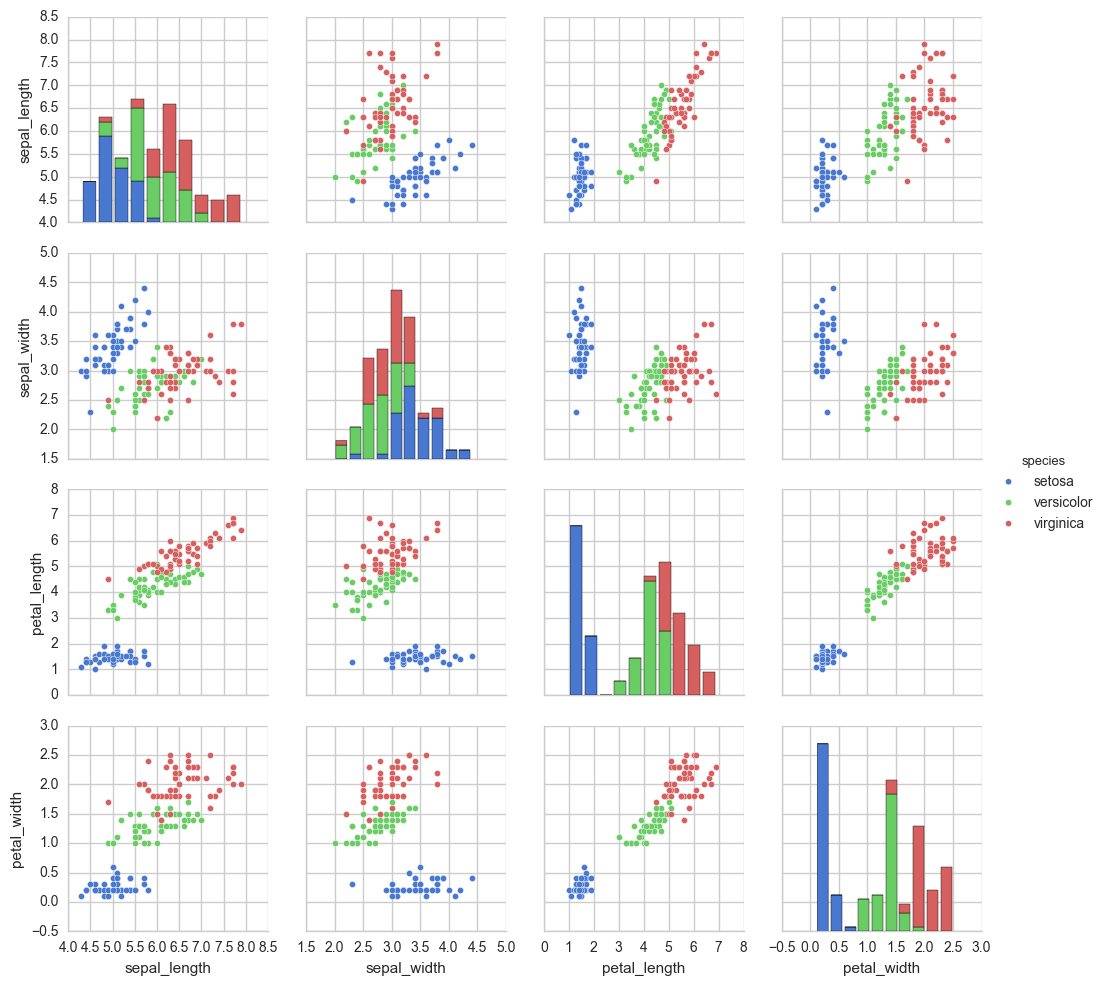

In [22]:
sns.pairplot(iris, hue="species")

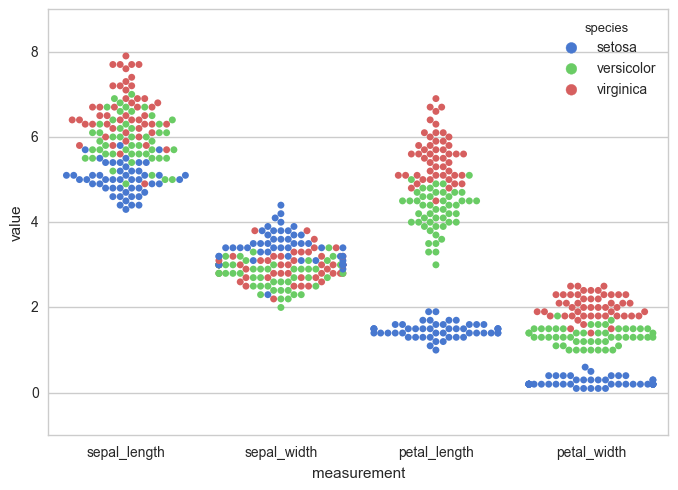

In [23]:
iris2 = pd.melt(iris, "species", var_name="measurement")
sns.swarmplot(x="measurement", y="value", hue="species", data=iris2)

In [24]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


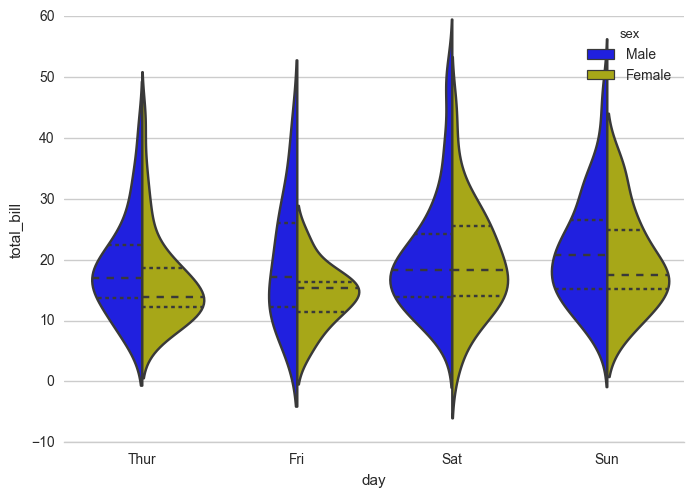

In [25]:
# Load the example tips dataset


# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

# Exercie 11.8

 * Avec la fonction sns.pairplot étudiez les variables "Fare","Survived","Age","Embarked", "Pclass"
 * Utilisez "survied pour la couleur 
 

# Solution 11.8

C:\Users\Dell Xps Sam\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


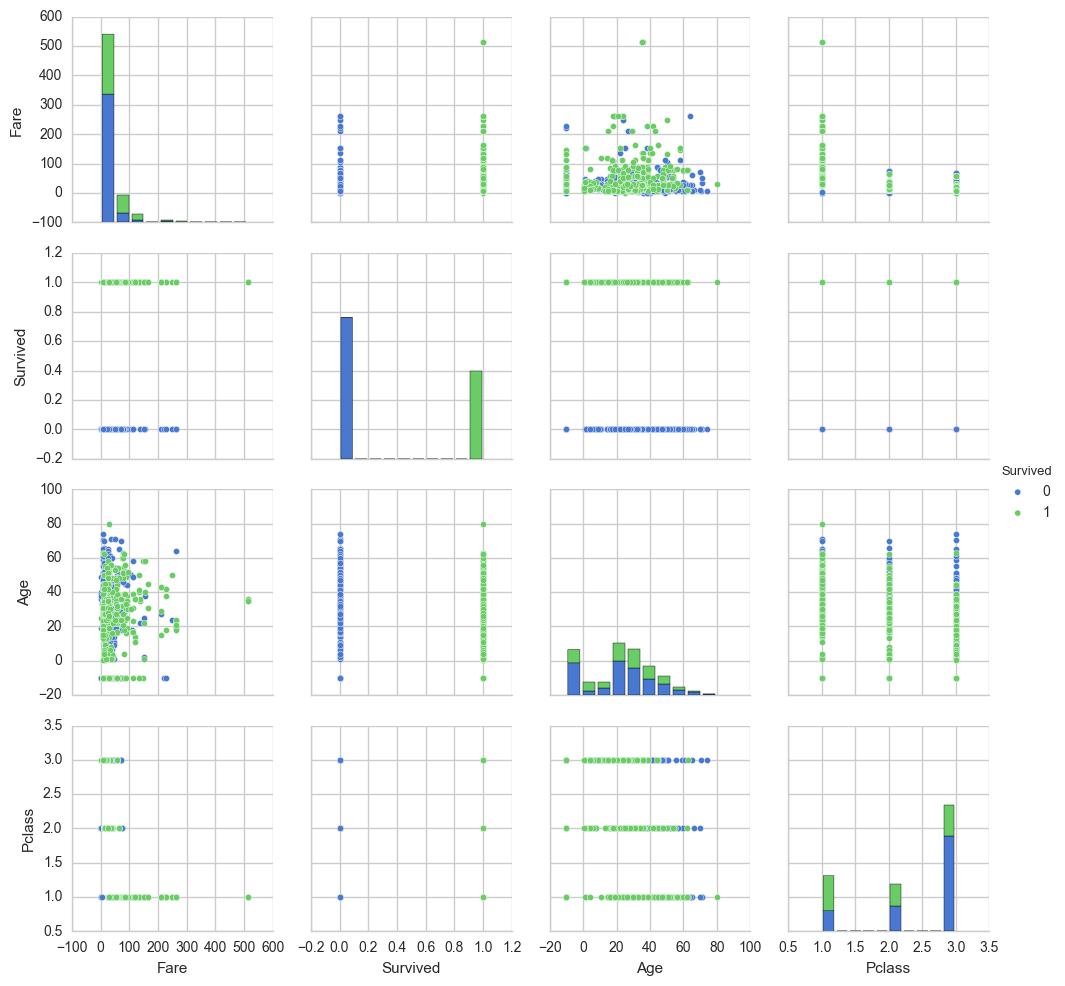

In [27]:
passenger = pd.read_excel('../data/dataset_titanic.xlsx')
data = passenger[["Fare","Survived","Age","Embarked", "Pclass"]]
data.loc[data['Age'].isnull(), 'Age'] = -10.
sns.pairplot(data=data, hue="Survived", dropna=True)

# Exercie 11.9

 * Avec violon plot sns.violinplot Etudiez le rix du billet en fonction du genre et de la classe.

# Solution 11.9

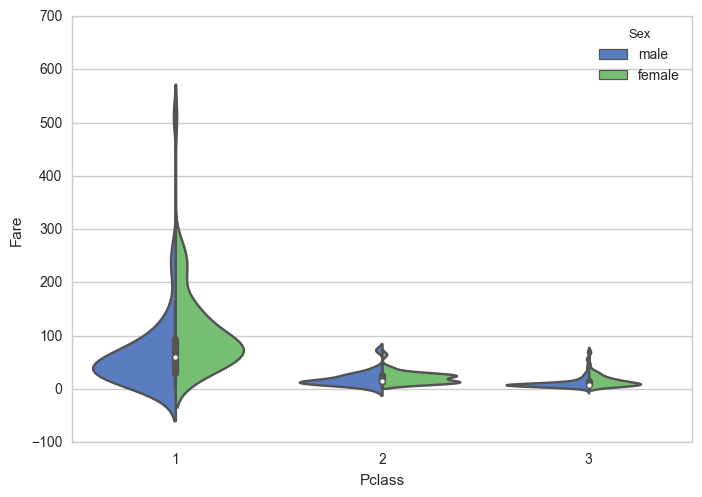

In [28]:
passenger = pd.read_excel('../data/dataset_titanic.xlsx')
data = passenger[["Fare","Sex", "Pclass"]]
sns.violinplot(x="Pclass", y="Fare", hue="Sex", data=data, split=True)#, palette={"Male": "b", "Female": "y"})



# Exercie 11.10

 * Avec la fonction swarmplot, trouver une represention qui pete la classe pour mettre valeur les variables "Embarked","Age", "Pclass"

# Soltuion 11.10

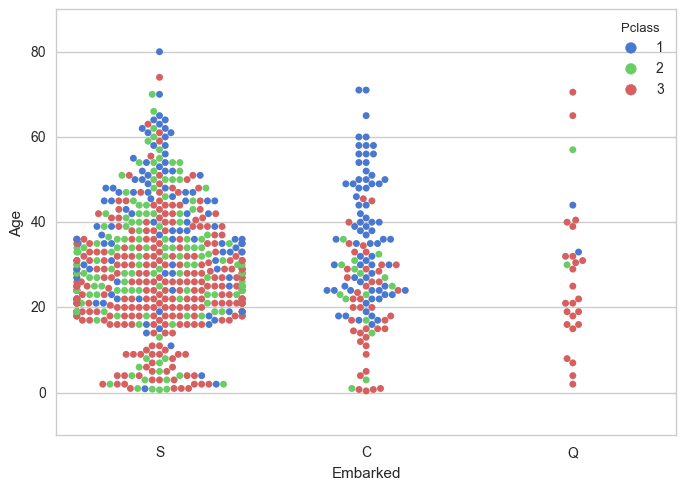

In [32]:
passenger = pd.read_excel('../data/dataset_titanic.xlsx')
data = passenger[["Embarked","Age", "Pclass"]]
sns.swarmplot(x="Embarked", y="Age", hue="Pclass", data=data)


# Exercice 11.11

 * Faite vous plaisir en regardant une regression entre age et le prix du billet par Pclass
 Attention le résultat est tout bidon

# Solution 11.11

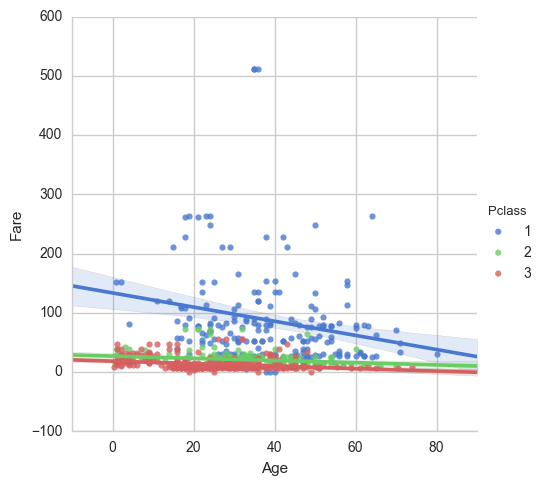

In [33]:
data = passenger
g = sns.lmplot(x="Age", y="Fare", hue='Pclass',  data=data, )

# Exercie 11.12

 * Soyez malins et trouver vous même un exercice avec sns.boxplot

# Solution 11.12

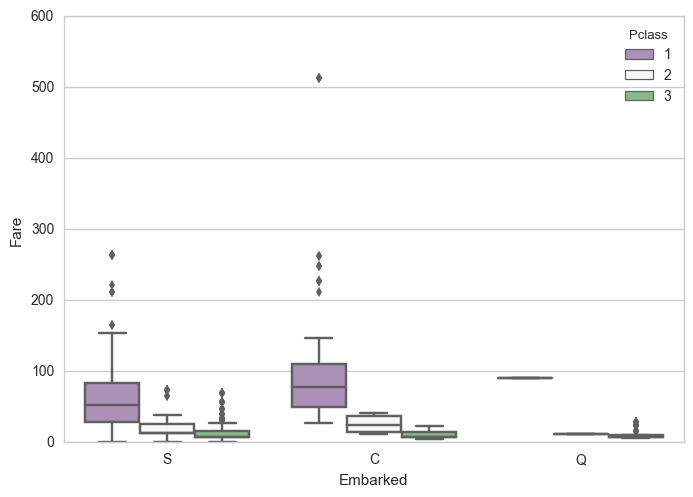

In [34]:
data = passenger
sns.boxplot(x="Embarked", y='Fare', hue="Pclass", data=data, palette="PRGn")

# Exercice 11.13

 * Donnez le top 5 des prenoms pour les garçons.


# Solution 11.13

In [35]:

passenger['firstname'] = passenger['Name'].str.extract('(Mr\. |Don\. |Master\. |Rev\. |Col\.[A-Za-z ]*\()([A-Za-z]*)')[1]
df = passenger[passenger.Sex=='male']
df.groupby('firstname')['firstname'].count().sort_values(ascending=False).head(20)




C:\Users\Dell Xps Sam\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


firstname
William      34
John         23
George       14
Charles      13
Thomas       13
James        11
Henry        11
Richard      10
Johan         9
Karl          8
Edward        8
Frederick     8
Robert        6
Samuel        6
Alfred        6
Joseph        6
Victor        5
Albert        5
Arthur        5
Peter         5
Name: firstname, dtype: int64

In [36]:
df.groupby(['firstname', 'Survived'])['firstname'].count().unstack('Survived').sort_values(by=0,ascending=False).head(8)

Survived,0,1
firstname,,
William,26.0,8.0
John,20.0,3.0
Thomas,11.0,2.0
James,10.0,1.0
Charles,10.0,3.0
George,10.0,4.0
Henry,9.0,2.0
Richard,8.0,2.0
